# HSV Color Space, Balloons

## Color Spaces

### Problem with color thresholds

Blue screen color selection heavily depends on even lighting and consistent colors. The simple color threshold would not work in the following scenario, where there are different light sources and shadows:

![Error with color threshold](images/pizza_bluescreen2.jpg)

To consistently detect objects under varying light conditions, there are other ways to represent the colors of an image. These color representations are often called **color spaces**.

### Color Spaces

A range of colors can be created by the primary colors of pigment and these colors then define a specific color space. Color space, also known as the color model (or color system), is an abstract mathematical model which simply describes the range of colors as tuples of numbers, typically as 3 or 4 values or color components (e.g. RGB). Basically speaking, color space is an elaboration of the coordinate system and sub-space. Each color in the system is represented by a single dot.

A color space is a useful method for users to understand the color capabilities of a particular digital device or file. It represents what a camera can see, a monitor can display or a printer can print, and etc. There are a variety of color spaces, such as RGB, HSV, HLS, as seen below.

![Color spaces](images/Color_spaces.png)

![HSV values](images/HSV_color_solid_cylinder_saturation_gray.png)

## Detect pink water baloons using HSV

### Import resources and display image

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


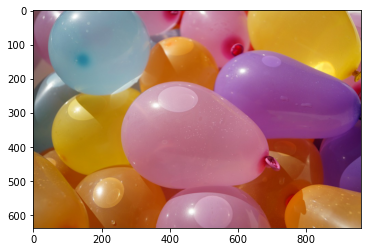

In [251]:
%matplotlib inline

# Read in the image
image = cv2.imread('images/water_balloons.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Plot color channels

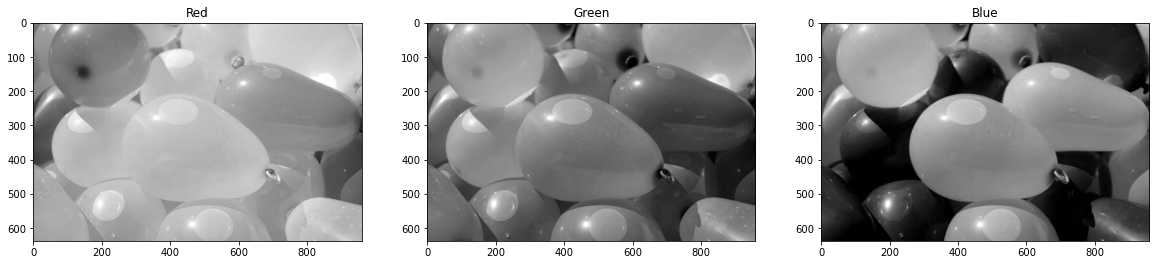

In [252]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')


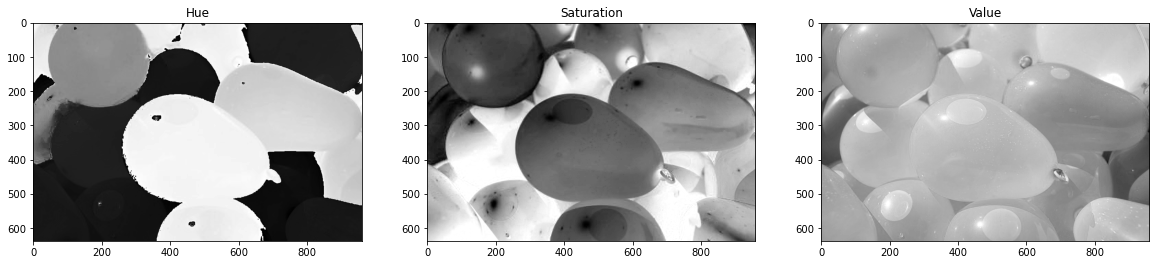

In [253]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

# If an object, like the balloons, are brighter, it means their color are closer to the end of the pie or sphere of the hue
ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

# If an object is brighter or nearly white, its not as saturated, or in other words, closer to its core color
ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

# If an object is brighter, its value is higher or near to 100%
ax3.set_title('Value')
ax3.imshow(v, cmap='gray')


### Define pink and hue selection thresholds

In [254]:
# Define our color selection criteria in HSV values

# Keep in mind that the hue in real life will go from 0 to 360 degrees. 0 is 0, and 360 is 255 here
# The same goes for saturation and value. 0 is 0, and 100 is 255
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])


In [255]:
# Define our color selection criteria in RGB values
# lower_pink = np.array([180,0,100]) 
# upper_pink = np.array([255,255,230])

lower_pink = np.array([160,0,120]) 
upper_pink = np.array([255,160,170])

### Mask the image 

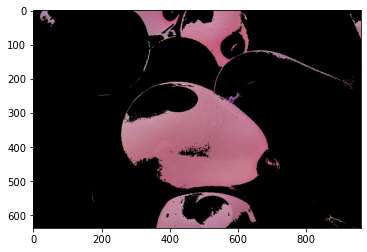

In [256]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

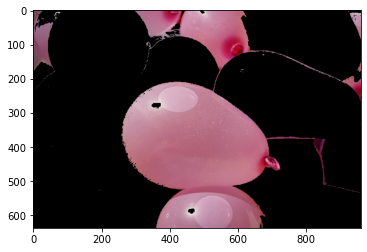

In [257]:
# Now try HSV!

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)